# Load the world and start the game

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_ollama import ChatOllama
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain


In [ ]:
import json
with open('PirateWorld.json', 'r') as file:
    world = json.load(file)
print(world)

{'World': [{'WorldName': 'Mares de la Furia', 'WorldDesc': 'Un mundo donde los piratas y sus barcos dominan el mar', 'IslanD1': [{'Island1Name': 'Isla del Viento', 'Island1Desc': 'Una isla rodeada de fuertes vientos y aguas turbulentas', 'Town1Name': 'Puerto del Viento', 'Town1Desc': 'Un pueblo pequeño pero apasionado, donde los piratas se refugian después de una larga jornada', 'Char1NameTown1': 'Cristina del Mar', 'Char1DescTown1': 'Una navegadora experimentada y astuta', 'Char1RoleTown1': 'Capitana del puerto', 'Char2NameTown1': 'Mateo el Feroz', 'Char2DescTown1': 'Un pirata despiadado y fuerte', 'Char2RoleTown1': 'Líder de los piratas'}]}, {'IslanD2': [{'Island2Name': 'Isla de las Gemas', 'Island2Desc': 'Una isla cubierta de joyas y tesoros ocultos', 'Town2Name': 'Villa de la Reina', 'Town2Desc': 'Un pueblo lujoso y rico, donde los dueños de las gemas viven en opulencia', 'Char1NameTown2': 'Isabel de la Marea', 'Char1DescTown2': 'Una reina sabia y justa', 'Char1RoleTown2': 'Reina d

In [ ]:
world['World'][0]

{'WorldName': 'Mares de la Furia',
 'WorldDesc': 'Un mundo donde los piratas y sus barcos dominan el mar',
 'IslanD1': [{'Island1Name': 'Isla del Viento',
   'Island1Desc': 'Una isla rodeada de fuertes vientos y aguas turbulentas',
   'Town1Name': 'Puerto del Viento',
   'Town1Desc': 'Un pueblo pequeño pero apasionado, donde los piratas se refugian después de una larga jornada',
   'Char1NameTown1': 'Cristina del Mar',
   'Char1DescTown1': 'Una navegadora experimentada y astuta',
   'Char1RoleTown1': 'Capitana del puerto',
   'Char2NameTown1': 'Mateo el Feroz',
   'Char2DescTown1': 'Un pirata despiadado y fuerte',
   'Char2RoleTown1': 'Líder de los piratas'}]}

In [ ]:
system_prompt = f"""You are an AI Game master. Your job is to create a
start to an adventure based on the world, island, town and character
a player is playing as.
Instructions:
You must only use 2-4 sentences \
Write in second person. For example: "You are Jack" \
Write in present tense. For example "You stand at..." \
First describe the character and their backstory. \
Then describes where they start and what they see around them.
Write always in spanish."""

world_info = f"""
World: {world['World'][0]}
Island: {world['World'][0]['IslanD1']}
Town: {world['World'][0]['IslanD1'][0]['Town1Name']}
Your Character: {world['World'][0]['IslanD1'][0]['Char2NameTown1']}
Your role: {world['World'][0]['IslanD1'][0]['Char2RoleTown1']}
"""

In [ ]:
world_info

"\nWorld: {'WorldName': 'Mares de la Furia', 'WorldDesc': 'Un mundo donde los piratas y sus barcos dominan el mar', 'IslanD1': [{'Island1Name': 'Isla del Viento', 'Island1Desc': 'Una isla rodeada de fuertes vientos y aguas turbulentas', 'Town1Name': 'Puerto del Viento', 'Town1Desc': 'Un pueblo pequeño pero apasionado, donde los piratas se refugian después de una larga jornada', 'Char1NameTown1': 'Cristina del Mar', 'Char1DescTown1': 'Una navegadora experimentada y astuta', 'Char1RoleTown1': 'Capitana del puerto', 'Char2NameTown1': 'Mateo el Feroz', 'Char2DescTown1': 'Un pirata despiadado y fuerte', 'Char2RoleTown1': 'Líder de los piratas'}]}\nIsland: [{'Island1Name': 'Isla del Viento', 'Island1Desc': 'Una isla rodeada de fuertes vientos y aguas turbulentas', 'Town1Name': 'Puerto del Viento', 'Town1Desc': 'Un pueblo pequeño pero apasionado, donde los piratas se refugian después de una larga jornada', 'Char1NameTown1': 'Cristina del Mar', 'Char1DescTown1': 'Una navegadora experimentada y

In [ ]:
messages=[
        SystemMessage(content=system_prompt),
        HumanMessage( content=world_info + '\nTu inicio:')
    ]

In [ ]:
local_llm = 'llama3'
llm = ChatOllama(model=local_llm, temperature=1)

parser = StrOutputParser()

chain = llm | parser

start=chain.invoke(messages)

In [ ]:
print(start)
world['start'] = start




Eres Mateo el Feroz, un pirata despiadado y fuerte. Como líder de los piratas, has llegado a Puerto del Viento después de una larga jornada en el mar. Estás parado en el centro del pequeño pueblo, rodeado por edificios de madera que tiemblan bajo el viento turbulento. Los habitantes del pueblo te miran con temor y respeto, sabiendo que eres uno de los más poderosos piratas en el mar.Mirando a tu alrededor, ves la playa arenosa donde las olas golpean fuerte contra la orilla. Al norte, veo el puerto natural protegido por una pequeña península, donde tus barcos anclan seguro. Al este, un grupo de edificios se levanta en lo alto de la colina, que se cree es la residencia de Cristina del Mar, la capitana del puerto. Al sur, veo el camino que lleva al interior de la isla, rodeada por bosques espesos y ríos turbios


In [ ]:
start = "Eres Mateo el Feroz, un pirata despiadado y fuerte. Como líder de los piratas, has llegado a Puerto del Viento después de una larga jornada en el mar. Estás parado en el centro del pequeño pueblo, rodeado por edificios de madera que tiemblan bajo el viento turbulento. Los habitantes del pueblo te miran con temor y respeto, sabiendo que eres uno de los más poderosos piratas en el mar.Mirando a tu alrededor, ves la playa arenosa donde las olas golpean fuerte contra la orilla. Al norte, veo el puerto natural protegido por una pequeña península, donde tus barcos anclan seguro. Al este, un grupo de edificios se levanta en lo alto de la colina, que se cree es la residencia de Cristina del Mar, la capitana del puerto. Al sur, veo el camino que lleva al interior de la isla, rodeada por bosques espesos y ríos turbios"

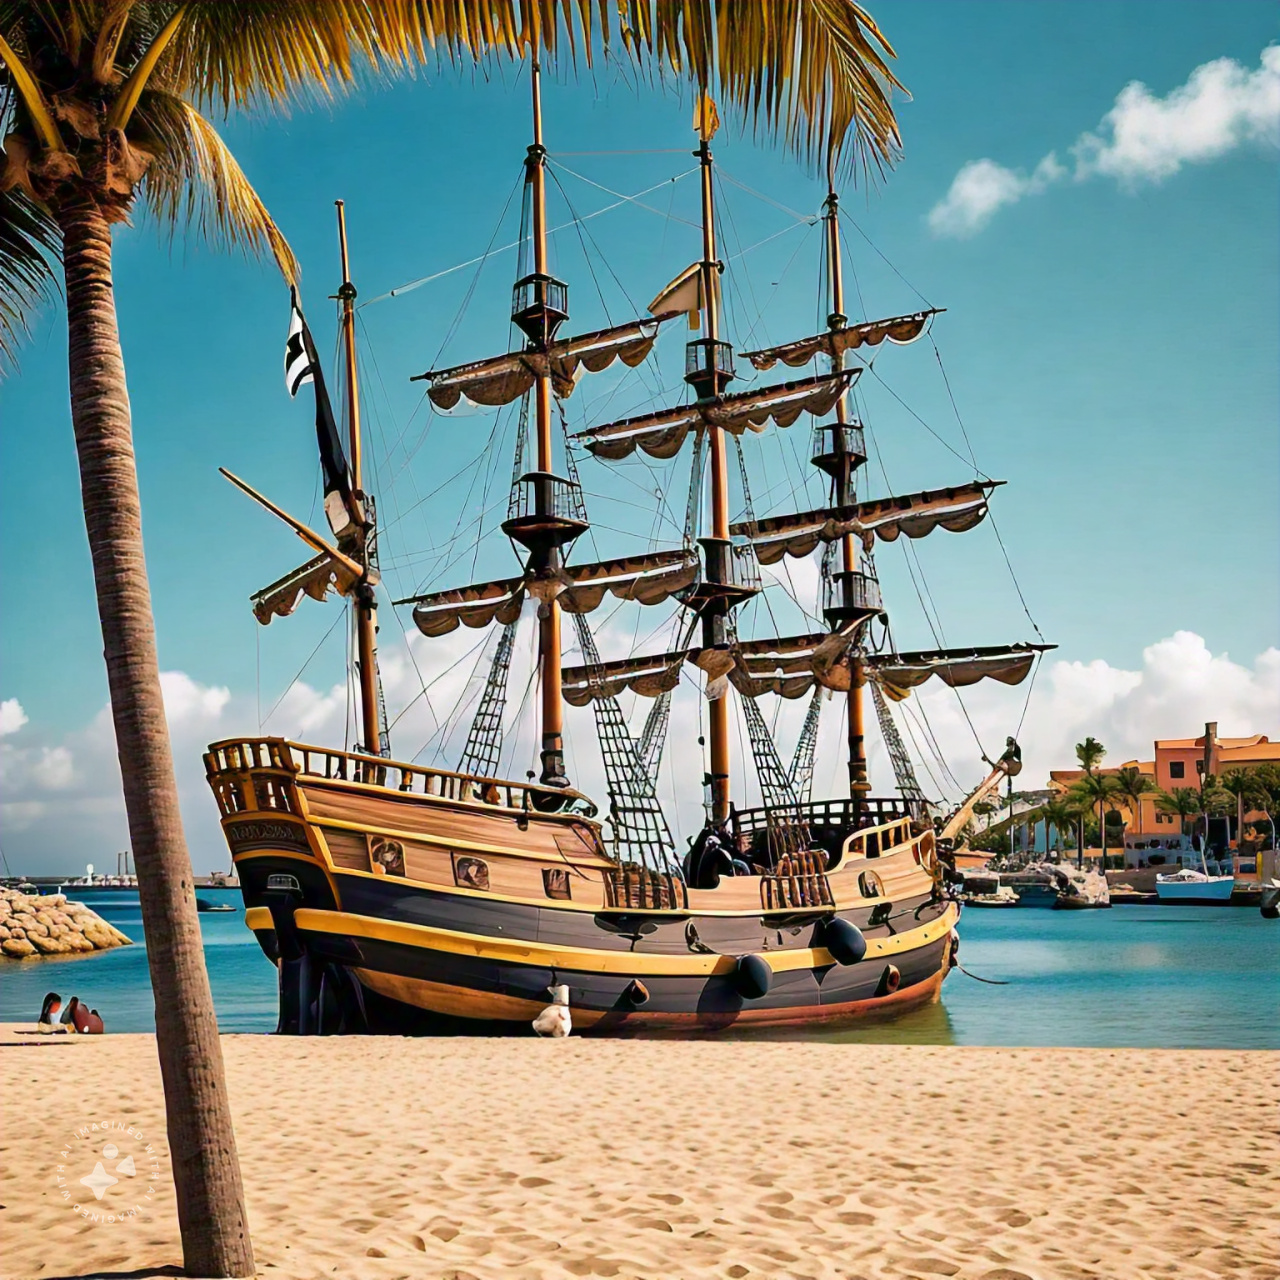

### MAIN ACTION

In [ ]:

game_state = {
    "world": world['World'][0]['WorldDesc'],
    "island": world['World'][0]['IslanD1'][0]['Island1Desc'],
    "town": world['World'][0]['IslanD1'][0]['Town1Desc'],
    "character": world['World'][0]['IslanD1'][0]['Char2DescTown1'],
    "start": start,
}
system_prompt = """You are an AI Game master. Your job is to write what \
happens next in a player's adventure game.\
Instructions: \
You must on only write 1-3 sentences in response. \
Always write in second person present tense. \
Ex. (You look north and see...). Write always in spanish."""

world_info = f"""
World: {game_state['world']}
Island: {game_state['island']}
Town: {game_state['town']}
Your Character:  {game_state['character']}"""

memory = []
messages = [
        SystemMessage(content=system_prompt),
        HumanMessage(content=world_info)
    ]
memory.append(messages)
local_llm = 'llama3'
llm = ChatOllama(model=local_llm, temperature=1)
parser = StrOutputParser()

chain = llm | parser


In [ ]:
print(game_state['start'])
print('Escribe "exit" para salir\n')
while True:
    message = input('Tu: ')
    print("Tu:",message)
    if message.lower() == 'exit':
        break
    messages.append({"role": "user", "content": message})
    result = chain.invoke(messages)
    messages.append({"role": "assistant", "content": result})
    print("Bot: ",result)




Eres Mateo el Feroz, un pirata despiadado y fuerte. Como líder de los piratas, has llegado a Puerto del Viento después de una larga jornada en el mar. Estás parado en el centro del pequeño pueblo, rodeado por edificios de madera que tiemblan bajo el viento turbulento. Los habitantes del pueblo te miran con temor y respeto, sabiendo que eres uno de los más poderosos piratas en el mar.Mirando a tu alrededor, ves la playa arenosa donde las olas golpean fuerte contra la orilla. Al norte, veo el puerto natural protegido por una pequeña península, donde tus barcos anclan seguro. Al este, un grupo de edificios se levanta en lo alto de la colina, que se cree es la residencia de Cristina del Mar, la capitana del puerto. Al sur, veo el camino que lleva al interior de la isla, rodeada por bosques espesos y ríos turbios
Escribe "exit" para salir

Sientes la arena caliente entre los dedos y el viento en tu pelo, mientras oyes el rugir del mar en el horizonte. Ves un barco hundido a lo lejos, con un